In [133]:
import csv 
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
from plotly.graph_objs import Bar, Layout
from plotly import offline 

### Explore the structure of the data and extract needed data


In [72]:
filename = 'spotifyglobalweekly20220609.csv' 
with open(filename) as f: 
    reader = csv.reader(f) 
    header_row = next(reader) 
    print(header_row)
    
    for index, column_header in enumerate(header_row): 
        print(index, column_header)
             
    artist_names, track_names, source, weeks_on_chart, peak_rank, streams= [], [], [], [], [], [] 
    for row in reader: 
        artist = str(row[2])  
        track = str(row[3])
        label_source = str(row[4])
        weeks_charting = int(row[7])
        peak_ranking = int(row[5]) 
        total_weekly_streams = int(row[8])
        title = str(row[2])
        artist_names.append(artist)
        track_names.append(track)
        source.append(label_source) 
        weeks_on_chart.append(weeks_charting)
        peak_rank.append(peak_ranking)
        streams.append(total_weekly_streams) 
    
    spot_df = {'Artist Names': artist_names, 'Track Names': track_names, 'Source': source, 'Weeks on Chart': weeks_on_chart, 'Peak Rank': peak_rank, 'Streams': streams}

['\ufeffrank', 'uri', 'artist_names', 'track_name', 'source', 'peak_rank', 'previous_rank', 'weeks_on_chart', 'streams']
0 ﻿rank
1 uri
2 artist_names
3 track_name
4 source
5 peak_rank
6 previous_rank
7 weeks_on_chart
8 streams


### Create pandas df from extracted data

In [6]:
SpotifyGlobalChartJune9th = pd.DataFrame(spot_df)

In [7]:
SpotifyGlobalChartJune9th

,Artist Names,Track Names,Source,Weeks on Chart,Peak Rank,Streams
0,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,Rhino,2,1,57221016
1,Harry Styles,As It Was,Columbia,10,1,56282016
2,"Bad Bunny, Chencho Corleone",Me Porto Bonito,Rimas Entertainment LLC,5,2,39839157
3,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,Rimas Entertainment LLC,5,3,37479812
4,Bad Bunny,Tití Me Preguntó,Rimas Entertainment LLC,5,5,32543225
...,...,...,...,...,...,...
195,"Mora, Sech",TUS LÁGRIMAS,Rimas Entertainment LLC,7,93,5765943
196,LE SSERAFIM,FEARLESS,SOURCE MUSIC,5,149,5751320
197,"David Guetta, Becky Hill, Ella Henderson",Crazy What Love Can Do,Parlophone UK,5,178,5750508
198,"Eminem, Nate Dogg",'Till I Collapse,Aftermath,50,81,5745070


### Get Descriptive Statistics for streams column

In [33]:
SpotifyGlobalChartJune9th['Streams'].describe()

count    2.000000e+02
mean     1.059363e+07
std      7.248791e+06
min      5.739641e+06
25%      6.558376e+06
50%      8.434314e+06
75%      1.128985e+07
max      5.722102e+07
Name: Streams, dtype: float64

### Get Descriptive Categorical Statistics for categorical data in Artist Name column

In [35]:
Artist_Categorical_stats = SpotifyGlobalChartJune9th['Artist Names'].describe()
print(Artist_Categorical_stats)

count           200
unique          141
top       Bad Bunny
freq             16
Name: Artist Names, dtype: object


### Get Descriptive data for tracks

In [43]:
SpotifyGlobalChartJune9th['Track Names'].describe() 

count                                   200
unique                                  200
top       Everybody Wants To Rule The World
freq                                      1
Name: Track Names, dtype: object

### Sort SpotifyGlobalChartJune9th by streams, weeks charting & source(label..etc) in desc order

In [49]:
SpotifyGlobalChartJune9th.sort_values(by=['Streams', 'Source', 'Weeks on Chart'], inplace = True, ascending=False)

SpotifyGlobalChartJune9th

,Artist Names,Track Names,Source,Weeks on Chart,Peak Rank,Streams
0,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,Rhino,2,1,57221016
1,Harry Styles,As It Was,Columbia,10,1,56282016
2,"Bad Bunny, Chencho Corleone",Me Porto Bonito,Rimas Entertainment LLC,5,2,39839157
3,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,Rimas Entertainment LLC,5,3,37479812
4,Bad Bunny,Tití Me Preguntó,Rimas Entertainment LLC,5,5,32543225
...,...,...,...,...,...,...
195,"Mora, Sech",TUS LÁGRIMAS,Rimas Entertainment LLC,7,93,5765943
196,LE SSERAFIM,FEARLESS,SOURCE MUSIC,5,149,5751320
197,"David Guetta, Becky Hill, Ella Henderson",Crazy What Love Can Do,Parlophone UK,5,178,5750508
198,"Eminem, Nate Dogg",'Till I Collapse,Aftermath,50,81,5745070


### Create a new dataframe containing top 10 streamed artists on Spotify for the week ending June9th

In [51]:
June9thTop_charting = SpotifyGlobalChartJune9th[:11]

June9thTop_charting

,Artist Names,Track Names,Source,Weeks on Chart,Peak Rank,Streams
0,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,Rhino,2,1,57221016
1,Harry Styles,As It Was,Columbia,10,1,56282016
2,"Bad Bunny, Chencho Corleone",Me Porto Bonito,Rimas Entertainment LLC,5,2,39839157
3,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,Rimas Entertainment LLC,5,3,37479812
4,Bad Bunny,Tití Me Preguntó,Rimas Entertainment LLC,5,5,32543225
5,Bad Bunny,Moscow Mule,Rimas Entertainment LLC,5,2,27519714
6,Bad Bunny,Efecto,Rimas Entertainment LLC,5,7,25669809
7,Harry Styles,Late Night Talking,Columbia,3,2,25101509
8,KAROL G,PROVENZA,UMLE - Latino,7,6,25061392
9,"Post Malone, Doja Cat",I Like You (A Happier Song) (with Doja Cat),Mercury Records/Republic Records,1,10,24340885


### Create a data frame of Universal Music Group affliated labels/subsidaries

In [124]:
UMG_Affliated = ['UMLE - Latino','Mercury/Republic Records', 'Republic Records', 'Polydor Records', 'Def Jam', 'RBMG/Def Jam', 'Darkroom/Interscope', 
                 'Interscope', 'Interscope Records', 'KIDinaKORNER/Interscope Records',  'pgLang/Top Dawg Entertainment/Aftermath/Interscope Records', 
                 'Olivia Rodrigo PS', 'Geffen', 'Darkroom', 'Universal Republic Records', 'UMC (Universal Music Catalogue)', 'XO /Republic', 
                 'Island Records', 'Aftermath', 'Universal Music AB', 'Cash Money', 'Young Money Ent.', 'Universal Rec.', 'BIGHIT Music', 
                 'Universal-Island Records Ltd.', 'Universal Music Spain S.L.', 'Mosley/ interscope', ]
             
UMG_sub = SpotifyGlobalChartJune9th[SpotifyGlobalChartJune9th.Source.isin(UMG_Affliated)]
    
UMG_labels = pd.DataFrame(UMG_sub)

UMG_labels

,Artist Names,Track Names,Source,Weeks on Chart,Peak Rank,Streams
8,KAROL G,PROVENZA,UMLE - Latino,7,6,25061392
12,Glass Animals,Heat Waves,Polydor Records,76,1,23533957
22,Justin Bieber,Ghost,RBMG/Def Jam,38,11,15176089
24,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,KIDinaKORNER/Interscope Records,32,3,14897069
29,Stephen Sanchez,Until I Found You,Republic Records,5,30,14179432
50,Olivia Rodrigo,good 4 u,Olivia Rodrigo PS,56,1,11287057
57,The Weeknd,Blinding Lights,Republic Records,132,1,10943671
60,Kendrick Lamar,N95,pgLang/Top Dawg Entertainment/Aftermath/Inters...,4,3,10684865
71,"Chris Jedi, Anuel AA, Chencho Corleone, Ñengo ...",La Llevo Al Cielo (Ft. Ñengo Flow),UMLE - Latino,3,72,9663274
78,Olivia Rodrigo,traitor,Olivia Rodrigo PS,55,7,9424839


### Descriptive Statistics for entire UMG affliated labels

In [125]:
total_UMG_streams = UMG_labels['Streams'].sum() 
mean_streams = UMG_labels['Streams'].mean()
max_streams = UMG_labels['Streams'].max()
min_streams = UMG_labels['Streams'].min()

print(f"Total amount of Spotify streams UMG affliated artists garnered for the week ending on June 9th was: {total_UMG_streams}.")
print(f"\nThe average streams per UMG affliated artist was: {mean_streams}.")
print(f"\nThe max value of streams for a UMG affliated artist was: {max_streams}.")
print(f"\nThe min value of streams for a UMG affliated artist was: {min_streams}.")

Total amount of Spotify streams UMG affliated artists garnered for the week ending on June 9th was: 364967323.

The average streams per UMG affliated artist was: 8689698.166666666.

The max value of streams for a UMG affliated artist was: 25061392.

The min value of streams for a UMG affliated artist was: 5739641.


### Vizualize top 10 streamed tracks on Spotify

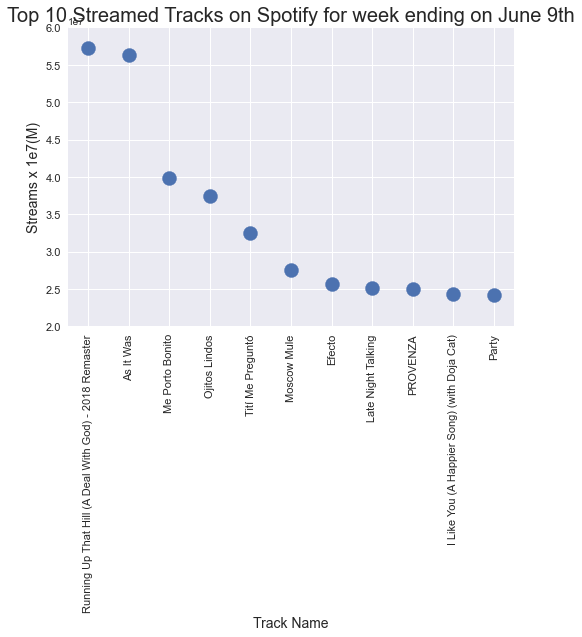

In [143]:
plt.style.use('seaborn') 
fig, ax = plt.subplots() 
ax.scatter(June9thTop_charting['Track Names'], June9thTop_charting['Streams'], s=200) 

ax.set_title("Top 10 Streamed Tracks on Spotify for week ending on June 9th", fontsize=20) 
ax.set_xlabel("Track Name", fontsize=14)
ax.set_ylabel("Streams x 1e7(M)", fontsize=14) 
plt.xticks(rotation = 90)
ax = plt.gca()
ax.set_ylim([20000000, 60000000])
ax.tick_params(axis='both', which='major', labelsize=11)

plt.show()


### Visualize UMG affliated Artist stream counts on Spotify

In [144]:
x_values = UMG_labels['Artist Names'] 
y_values = UMG_labels['Streams']
data = [Bar(x=x_values, y=y_values)] 

x_axis_config = {'title': 'Artist(s)'} 
y_axis_config = {'title': 'Stream Total'} 
my_layout = Layout(title='Week of June 9th, Streams on Spotify for UMG Artists', 
                   xaxis=x_axis_config, yaxis=y_axis_config) 
offline.plot({'data': data, 'layout': my_layout}, filename='Spotify_UMG_Streams.html')


'Spotify_UMG_Streams.html'